### **AgenceORE - Open Data**

#### Summary

| Number of Profiles | Profile Types                               | Load Details                    | Renewables | Environment | Economy | Voltage Level | Processed | Synthetic | Horizon  | Time Resolution | Location | Geographical          | Folder                                     |
|--------------------|---------------------------------------------|----------------------------------|------------|-------------|---------|---------------|-----------|-----------|----------|-----------------|----------|-----------------------|--------------------------------------------|
| 130                | Load, Consumption Points, Energy Consumption | Active, Aggregated, Residential | None       | None        | None    | None          | True      | False     | 2020–2024 | 30 min          | France   | Regional, Distribution | [Open Folder](AgenceORE_Consumption_lt36kVA/) |

---

#### Data Components:
The Agence ORE dataset provides aggregated half-hourly electricity consumption data for delivery points with contracted power below 36 kVA, across various regions in France. All data is delivered in CSV format.


| Profile Type           | Description                                                                         | Role     |
|------------------------|-------------------------------------------------------------------------------------|----------|
| `Consumption Points` (65 profiles)  | 	Number of active delivery points (<36 kVA) per region and per interval             | Consumer |
| `Energy Consumption` (65 profiles)  | Half-hourly electricity consumption (in Wh) aggregated by region and time (load)    | Consumer |


---

#### File Locations:

| Profile Type                          | Raw Source Location      | Processed Folder Location               |
|---------------------------------------|--------------------------|-----------------------------------------|
| `active_energy`, `consumption_points` | [Raw](./raw/)            | [Consumer](./processed/consumer/)       |

---

#### Profile Volume:
  - **Time Resolution**: 30 min
  - **Length**:
    - `consumption_30min_2020.csv`:         263520 rows
    - `consumption_30min_2021.csv`:         262800 rows
    - `consumption_30min_2022.csv`:         262800 rows
    - `consumption_30min_2023.csv`:         262800 rows
    - `consumption_30min_2024.csv`:         263520 rows
  - **Horizon**: 2020–2024

> **Note:** AgenceORE time series are based on **real measurements** reported by distribution system operators and grid managers.

---

#### Description:  
This dataset contains aggregated electricity consumption data at a 30-minute resolution for delivery points with contracted power below 36 kVA, across French administrative regions. Each record includes the timestamp (HORODATE), the number of active delivery points (NB_POINTS_SOUTIRAGE), and the total active energy consumed (ENERGIE_SOUTIREE) in watt-hours. The data is provided by various distribution system operators (GRD), such as Enedis and local grid managers.

> **Units:**  
> - **Active energy consumed**: **watt-hours (Wh)**  
> - **Number of delivery points**: **unitless count**  
---

#### Related Links:  
  - [Documentation](https://www.agenceore.fr/opendata/consommation-agregee-demi-horaire-des-points-de-soutirage-inferieurs-36kva-par-region)


#### Length of each dataset

In [1]:
import os
import pandas as pd

# Set your data directory
data_dir = "raw/"

# Store results
lengths = []

# Go through each CSV file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        try:
            df = pd.read_csv(file_path, sep=";", encoding="utf-8")
            lengths.append({"File": filename, "Number of Rows": len(df)})
        except Exception as e:
            lengths.append({"File": filename, "Number of Rows": f"Error: {e}"})

# Convert to DataFrame and display
lengths_df = pd.DataFrame(lengths)
print(lengths_df.to_string(index=False))

                      File  Number of Rows
consumption_30min_2020.csv          263520
consumption_30min_2021.csv          262800
consumption_30min_2022.csv          262800
consumption_30min_2023.csv          262800
consumption_30min_2024.csv          263520


#### Check for missing values

In [2]:
# Store results
missing_summary = []

# Go through each CSV file
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        try:
            df = pd.read_csv(file_path, sep=";", encoding="utf-8")
            total_missing = df.isnull().sum().sum()  # total missing values
            missing_summary.append({
                "File": filename,
                "Missing Values": total_missing
            })
        except Exception as e:
            missing_summary.append({
                "File": filename,
                "Missing Values": f"Error: {e}"
            })

# Display result as table
missing_df = pd.DataFrame(missing_summary)
print(missing_df.to_string(index=False))


                      File  Missing Values
consumption_30min_2020.csv               0
consumption_30min_2021.csv               0
consumption_30min_2022.csv               0
consumption_30min_2023.csv               0
consumption_30min_2024.csv               0


#### Data Organization Process

In [3]:
# ### import pandas as pd

# ### Load raw CSV (handles accents, datetime parsing)
# ### Replace # with the actual number
# df = pd.read_csv("raw/consumption_30min_202#.csv", sep=";", encoding="utf-8", parse_dates=["HORODATE"])

# ### Rename to clean English headers
# df = df.rename(columns={
#     "HORODATE": "TIME",
#     "REGION": "REGION",
#     "NB_POINTS_SOUTIRAGE": "NUMBER_OF_CONSUMPTION_POINTS",
#     "ENERGIE_SOUTIREE": "ACTIVE_ENERGY_CONSUMED"
# })

# ### Group by TIME and REGION
# df_grouped = df.groupby(["TIME", "REGION"], as_index=False).agg({
#     "NUMBER_OF_CONSUMPTION_POINTS": "sum",
#     "ACTIVE_ENERGY_CONSUMED": "sum"
# })

# ### Rename to final output column names
# df_grouped.columns = [
#     "TIME", 
#     "REGION", 
#     "TOTAL_CONSUMPTION_POINTS", 
#     "TOTAL_ACTIVE_ENERGY"
#]

# ### Sort by time
# df_grouped = df_grouped.sort_values(by="TIME")

# ### Pivot to wide-format: one row per TIME, each region has 2 columns
# pivot_cons = df_grouped.pivot(index="TIME", columns="REGION", values="TOTAL_CONSUMPTION_POINTS")
# pivot_energy = df_grouped.pivot(index="TIME", columns="REGION", values="TOTAL_ACTIVE_ENERGY")

# ### Rename columns to clarify meaning
# pivot_cons.columns = [f"{region}_CONS_PTS" for region in pivot_cons.columns]
# pivot_energy.columns = [f"{region}_ACTIVE_ENERGY" for region in pivot_energy.columns]

# ### Combine both pivoted tables
# df_pivoted = pd.concat([pivot_cons, pivot_energy], axis=1).reset_index()

# ### Sort columns alphabetically (after TIME)
# cols_sorted = ["TIME"] + sorted([col for col in df_pivoted.columns if col != "TIME"])
# df_pivoted = df_pivoted[cols_sorted]

# ### Split into two separate DataFrames

# ### Consumption points file
# ### Replace # with the actual number
# df_cons_only = df_pivoted[["TIME"] + [col for col in df_pivoted.columns if col.endswith("_CONS_PTS")]]
# df_cons_only.to_csv("consumption_points_30min_202#.csv", sep=";", index=False, encoding="utf-8-sig")

# ### Active energy file
# ### Replace # with the actual number
# df_energy_only = df_pivoted[["TIME"] + [col for col in df_pivoted.columns if col.endswith("_ACTIVE_ENERGY")]]
# df_energy_only.to_csv("active_energy_30min_202#.csv", sep=";", index=False, encoding="utf-8-sig")



#### Visualizing AgenceORE Active Energy Data

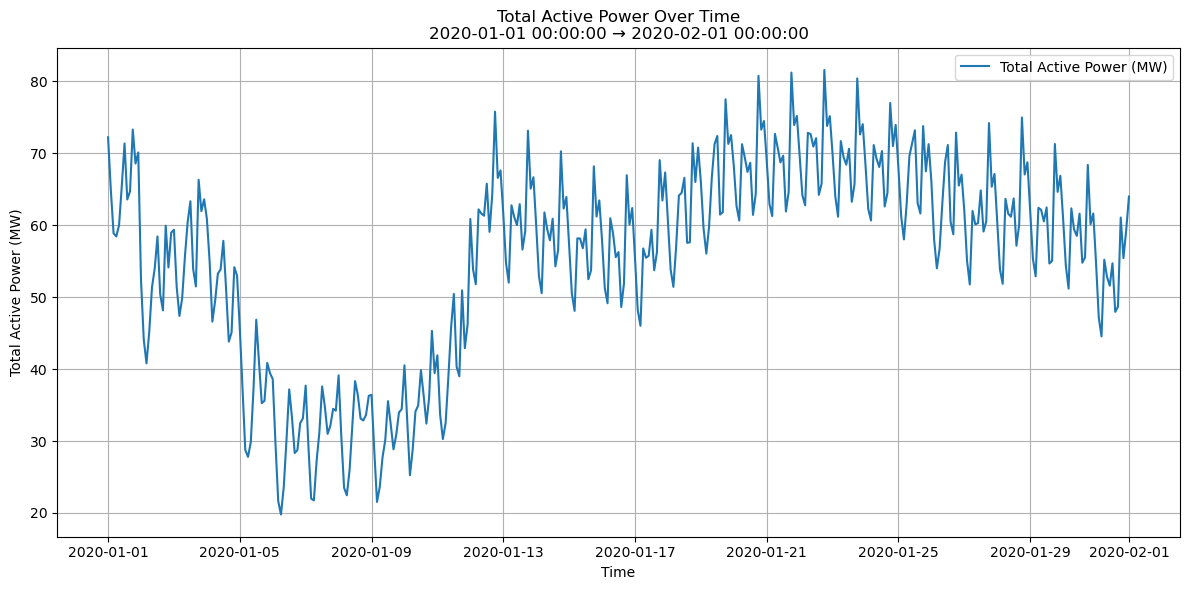

In [4]:
import sys
sys.path.append("..")

from utils.agenceore_consumption_plotter import plot_consumption_total_active_power

# Change year if needed (2020 - 2024)
plot_consumption_total_active_power(
    fp="raw/consumption_30min_2020.csv",
    start_time="2020-01-01 00:00:00",
    end_time="2020-02-01 00:00:00",
    max_points=300
)